<a href="https://colab.research.google.com/github/VesalAhsani/Driver-behavior-detection/blob/main/Yolov8_cls_Day_imbalancedWeights_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this model, we trained Day dataset with 6 classes, considering imbalanced weights randomly.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.path.exists('/content/drive/MyDrive/Day_C123.zip'))

True


In [ ]:
import zipfile
zip_path = '/content/drive/MyDrive/Day_C123.zip'  # Adjust the path
extract_path = '/content/day-c123'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Dataset unzipped successfully!")

Dataset unzipped successfully!


In [ ]:
!pip install ultralytics --upgrade

from ultralytics import YOLO
print("Ultralytics library imported successfully!")

from ultralytics.data.utils import check_cls_dataset

# Pass the directory containing the dataset, not the YAML file
dataset = check_cls_dataset("/content/day-c123/Day_C123")
print(dataset)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 49.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics library imported successfully!
train: /content/day-c123/Day_C123/train... found 198748 images in 6 classes ✅ 
val: /content/day-c123/Day_C123/val... found 17152 images in 6 classes ✅ 
test: /content/day-c123/Day_C123/test... found 17156 images in 6 classes ✅ 
{'train': PosixPath('/content/day-c123/Day_C123/train'), 'val': PosixPath('/content/day-c123/Day_C123/val'), 'test': PosixPath('/content/day-c123/Day_C123/test'), 'nc': 6, 'names': {0: 'Distraction', 1: 'EatingDrinking', 2: 'PhoneUsage', 3: 'SafeDriving', 4: 'Sleepy', 5: 'Smoking'}}


In [ ]:
import glob

train_images = glob.glob("/content/day-c123/Day_C123/train/*/*.jpg")
val_images = glob.glob("/content/day-c123/Day_C123/val/*/*.jpg")

print(f"Number of training images: {len(train_images)}")
print(f"Number of validation images: {len(val_images)}")

Number of training images: 198748
Number of validation images: 17152


In [ ]:
import os
import torch
import torch.nn as nn
from ultralytics import YOLO

# Define class weights
class_weights = torch.tensor([1.0, 3.0, 2.0, 3.0, 3.0, 3.0]).to('cuda')  # Adjust values as needed

# Custom weighted loss function
def custom_loss(pred, target):
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    return criterion(pred, target)

# Define callback function to copy weights after each epoch
def save_weights_callback(trainer):
    epoch = trainer.epoch + 1  # Current epoch (1-based index)
    save_dir = trainer.save_dir
    weights_dir = os.path.join(save_dir, "weights")
    if os.path.exists(weights_dir):
        for weight_file in os.listdir(weights_dir):
            if weight_file.endswith(".pt"):  # Copy all .pt files
                src_path = os.path.join(weights_dir, weight_file)
                dest_path = f"/content/drive/My Drive/YoloWeights/{weight_file}"
                print(f"Copying {weight_file} to Google Drive...")
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                os.system(f"cp {src_path} {dest_path}")

# Load the YOLOv8 model
model = YOLO('yolov8n-cls.pt')

# Attach the callback to the training process
model.add_callback("on_epoch_end", save_weights_callback)

# Modify the training pipeline
model.model.criterion = custom_loss  # Override the loss function

# Train the model
model.train(
    data='/content/day-c123/Day_C123',  # Dataset path
    epochs=50,  # Number of epochs
    batch=32,  # Batch size
    imgsz=224,  # Image size
    name='yolov8_day_classification',  # Run name
    optimizer='Adam',  # Optimizer
    device=0,  # Use GPU
    save_period=1,  # Save weights every epoch
)

100%|██████████| 5.31M/5.31M [00:00<00:00, 372MB/s]


Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/day-c123/Day_C123, epochs=50, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=yolov8_day_classification, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 5.35M/5.35M [00:00<00:00, 336MB/s]


AMP: checks passed ✅


train: Scanning /content/day-c123/Day_C123/train... 198726 images, 22 corrupt: 100%|██████████| 198748/198748 [01:28<00:00, 2257.89it/s]

train: WARNING ⚠️ /content/day-c123/Day_C123/train/PhoneUsage/P007_V3_S3_0304093.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/day-c123/Day_C123/train/PhoneUsage/P007_V3_S3_0307081.jpg: ignoring corrupt image/label: broken data stream when reading image file
train: WARNING ⚠️ /content/day-c123/Day_C123/train/PhoneUsage/P009_V1_S2_0202851.jpg: ignoring corrupt image/label: cannot identify image file '/content/day-c123/Day_C123/train/PhoneUsage/P009_V1_S2_0202851.jpg'
train: WARNING ⚠️ /content/day-c123/Day_C123/train/PhoneUsage/P010_V1_S2_0303094.jpg: ignoring corrupt image/label: cannot identify image file '/content/day-c123/Day_C123/train/PhoneUsage/P010_V1_S2_0303094.jpg'
train: WARNING ⚠️ /content/day-c123/Day_C123/train/PhoneUsage/P015_V1_S1_010245.jpg: ignoring corrupt image/label: cannot identify image file '/content/day-c123/Day_C123/train/PhoneUsage/P015_V1_S1_010245.jpg'
train: WARNING ⚠️ /content/day-c123/Day_C123/train/PhoneUsage/P016_V1_S1_010217.jpg: corr

train: New cache created: /content/day-c123/Day_C123/train.cache


val: Scanning /content/day-c123/Day_C123/val... 17152 images, 0 corrupt: 100%|██████████| 17152/17152 [00:07<00:00, 2187.36it/s]


val: New cache created: /content/day-c123/Day_C123/val.cache
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/classify/yolov8_day_classification
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.457G      1.746         32        224:   0%|          | 31/6211 [00:02<04:38, 22.16it/s]

       1/50     0.457G      1.716         32        224:   1%|          | 64/6211 [00:03<04:20, 23.60it/s]
100%|██████████| 755k/755k [00:00<00:00, 71.0MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.84it/s]

                   all      0.765      0.995



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 40.13it/s]


                   all      0.816      0.998

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.52it/s]

                   all      0.827      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 43.69it/s]


                   all       0.83      0.997

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.03it/s]


                   all      0.822      0.998

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 43.37it/s]

                   all      0.815      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.50it/s]

                   all      0.793      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.32it/s]

                   all      0.781      0.996



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.29it/s]

                   all      0.785      0.996



      Epoch    GPU_mem       loss  Instances       Size


      10/50     0.405G     0.7786          6        224: 100%|██████████| 6211/6211 [03:46<00:00, 27.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.36it/s]

                   all      0.791      0.996



      Epoch    GPU_mem       loss  Instances       Size


      11/50     0.401G     0.7707          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.00it/s]

                   all      0.805      0.997



      Epoch    GPU_mem       loss  Instances       Size


      12/50     0.405G     0.7626          6        224: 100%|██████████| 6211/6211 [03:46<00:00, 27.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.86it/s]

                   all      0.817      0.997



      Epoch    GPU_mem       loss  Instances       Size


      13/50     0.401G     0.7604          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 40.35it/s]

                   all      0.828      0.997



      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.405G     0.7503          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 43.30it/s]

                   all      0.834      0.998



      Epoch    GPU_mem       loss  Instances       Size


      15/50     0.401G     0.7428          6        224: 100%|██████████| 6211/6211 [03:48<00:00, 27.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.63it/s]

                   all      0.841      0.998



      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.405G     0.7355          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 40.71it/s]


                   all      0.847      0.998

      Epoch    GPU_mem       loss  Instances       Size


      17/50     0.401G      0.726          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.85it/s]

                   all      0.855      0.998



      Epoch    GPU_mem       loss  Instances       Size


      18/50     0.405G     0.7197          6        224: 100%|██████████| 6211/6211 [03:54<00:00, 26.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 39.83it/s]

                   all      0.861      0.998



      Epoch    GPU_mem       loss  Instances       Size


      19/50     0.401G     0.7182          6        224: 100%|██████████| 6211/6211 [03:54<00:00, 26.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 40.43it/s]

                   all      0.863      0.998



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.405G     0.7108          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.17it/s]

                   all      0.865      0.998



      Epoch    GPU_mem       loss  Instances       Size


      21/50     0.401G     0.7043          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.36it/s]


                   all      0.868      0.998

      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.405G     0.6928          6        224: 100%|██████████| 6211/6211 [03:46<00:00, 27.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.74it/s]

                   all       0.87      0.998



      Epoch    GPU_mem       loss  Instances       Size


      23/50     0.401G     0.6885          6        224: 100%|██████████| 6211/6211 [03:46<00:00, 27.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:05<00:00, 44.70it/s]


                   all      0.871      0.998

      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.405G       0.68          6        224: 100%|██████████| 6211/6211 [03:46<00:00, 27.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.52it/s]

                   all      0.873      0.998



      Epoch    GPU_mem       loss  Instances       Size


      25/50     0.401G     0.6736          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.52it/s]

                   all      0.875      0.998



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.405G     0.6673          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 44.21it/s]

                   all      0.877      0.998



      Epoch    GPU_mem       loss  Instances       Size


      27/50     0.401G     0.6597          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 40.56it/s]

                   all       0.88      0.998



      Epoch    GPU_mem       loss  Instances       Size


      28/50     0.405G     0.6529          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.77it/s]

                   all      0.881      0.998



      Epoch    GPU_mem       loss  Instances       Size


      29/50     0.401G     0.6481          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.14it/s]

                   all      0.883      0.998



      Epoch    GPU_mem       loss  Instances       Size


      30/50     0.405G     0.6349          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.66it/s]

                   all      0.886      0.998



      Epoch    GPU_mem       loss  Instances       Size


      31/50     0.401G     0.6294          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 43.89it/s]

                   all      0.886      0.998



      Epoch    GPU_mem       loss  Instances       Size


      32/50     0.405G     0.6204          6        224: 100%|██████████| 6211/6211 [03:46<00:00, 27.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.21it/s]

                   all      0.889      0.998



      Epoch    GPU_mem       loss  Instances       Size


      33/50     0.401G     0.6137          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.66it/s]

                   all      0.891      0.998



      Epoch    GPU_mem       loss  Instances       Size


      34/50     0.405G     0.6064          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.57it/s]


                   all      0.892      0.998

      Epoch    GPU_mem       loss  Instances       Size


      35/50     0.401G      0.595          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.21it/s]

                   all      0.895      0.998



      Epoch    GPU_mem       loss  Instances       Size


      36/50     0.405G     0.5868          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.11it/s]

                   all      0.896      0.998



      Epoch    GPU_mem       loss  Instances       Size


      37/50     0.401G     0.5764          6        224: 100%|██████████| 6211/6211 [03:48<00:00, 27.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 39.98it/s]


                   all      0.896      0.999

      Epoch    GPU_mem       loss  Instances       Size


      38/50     0.405G     0.5668          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.14it/s]

                   all      0.898      0.999



      Epoch    GPU_mem       loss  Instances       Size


      39/50     0.401G     0.5558          6        224: 100%|██████████| 6211/6211 [03:47<00:00, 27.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.13it/s]

                   all        0.9      0.999



      Epoch    GPU_mem       loss  Instances       Size


      40/50     0.405G     0.5477          6        224: 100%|██████████| 6211/6211 [03:48<00:00, 27.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 40.99it/s]

                   all      0.903      0.999



      Epoch    GPU_mem       loss  Instances       Size


      41/50     0.401G     0.5365          6        224: 100%|██████████| 6211/6211 [03:49<00:00, 27.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 44.02it/s]

                   all      0.905      0.999



      Epoch    GPU_mem       loss  Instances       Size


      42/50     0.405G     0.5271          6        224: 100%|██████████| 6211/6211 [03:49<00:00, 27.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 40.25it/s]

                   all      0.907      0.999



      Epoch    GPU_mem       loss  Instances       Size


      43/50     0.401G     0.5126          6        224: 100%|██████████| 6211/6211 [03:49<00:00, 27.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 43.05it/s]

                   all      0.909      0.999



      Epoch    GPU_mem       loss  Instances       Size


      44/50     0.405G     0.5011          6        224: 100%|██████████| 6211/6211 [03:49<00:00, 27.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 40.62it/s]

                   all       0.91      0.999



      Epoch    GPU_mem       loss  Instances       Size


      45/50     0.401G     0.4855          6        224: 100%|██████████| 6211/6211 [03:48<00:00, 27.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 43.20it/s]

                   all      0.911      0.999



      Epoch    GPU_mem       loss  Instances       Size


      46/50     0.405G     0.4726          6        224: 100%|██████████| 6211/6211 [03:49<00:00, 27.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 40.54it/s]

                   all      0.914      0.999



      Epoch    GPU_mem       loss  Instances       Size


      47/50     0.401G     0.4596          6        224: 100%|██████████| 6211/6211 [03:49<00:00, 27.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.46it/s]

                   all      0.915      0.999



      Epoch    GPU_mem       loss  Instances       Size


      48/50     0.405G     0.4429          6        224: 100%|██████████| 6211/6211 [03:49<00:00, 27.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.33it/s]


                   all      0.918      0.999

      Epoch    GPU_mem       loss  Instances       Size


      49/50     0.401G     0.4287          6        224: 100%|██████████| 6211/6211 [03:49<00:00, 27.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.80it/s]

                   all       0.92      0.999



      Epoch    GPU_mem       loss  Instances       Size


      50/50     0.405G     0.4117          6        224: 100%|██████████| 6211/6211 [03:49<00:00, 27.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 42.43it/s]

                   all      0.921      0.999



50 epochs completed in 3.286 hours.
Optimizer stripped from runs/classify/yolov8_day_classification/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/yolov8_day_classification/weights/best.pt, 3.0MB

Validating runs/classify/yolov8_day_classification/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/day-c123/Day_C123/train... found 198748 images in 6 classes ✅ 
val: /content/day-c123/Day_C123/val... found 17152 images in 6 classes ✅ 
test: /content/day-c123/Day_C123/test... found 17156 images in 6 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 268/268 [00:06<00:00, 41.86it/s]


                   all      0.921      0.999
Speed: 0.1ms preprocess, 0.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/yolov8_day_classification


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ecc9584b850>
curves: []
curves_results: []
fitness: 0.9601795673370361
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9211753606796265, 'metrics/accuracy_top5': 0.9991837739944458, 'fitness': 0.9601795673370361}
save_dir: PosixPath('runs/classify/yolov8_day_classification')
speed: {'preprocess': 0.05804214960158761, 'inference': 0.10550940937515516, 'loss': 0.00024596646205702824, 'postprocess': 0.00031428661809038757}
task: 'classify'
top1: 0.9211753606796265
top5: 0.9991837739944458

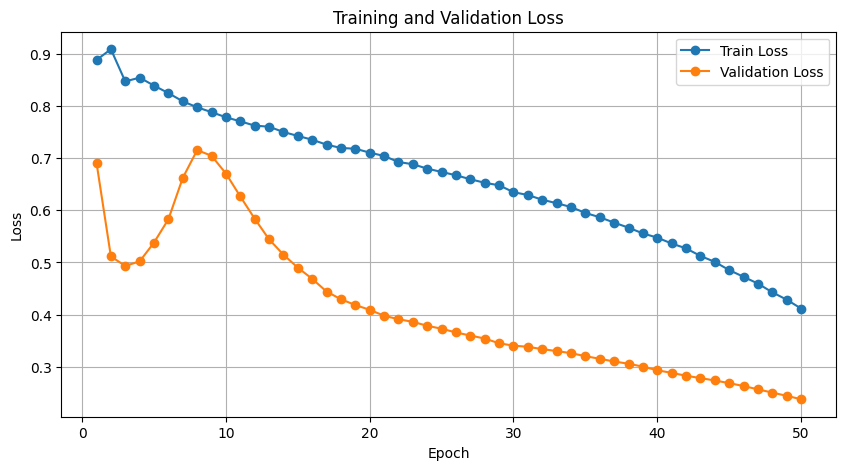

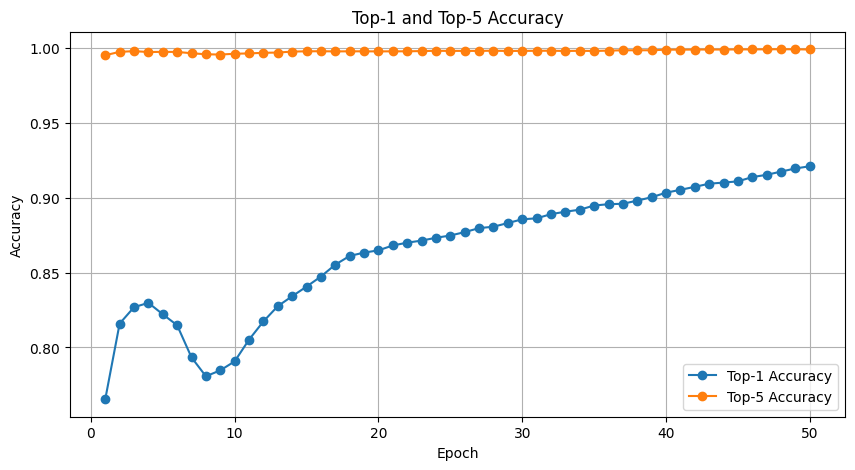

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Path to the results.csv generated during training
results_path = 'runs/classify/yolov8_day_classification/results.csv'


# Load training results
results = pd.read_csv(results_path)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['train/loss'], label='Train Loss', marker='o')
plt.plot(results['epoch'], results['val/loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.savefig('runs/classify/yolov8_day_classification/loss_curve.png')
plt.show()

# Plot top-1 and top-5 accuracies
plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['metrics/accuracy_top1'], label='Top-1 Accuracy', marker='o')
plt.plot(results['epoch'], results['metrics/accuracy_top5'], label='Top-5 Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Top-1 and Top-5 Accuracy')
plt.legend()
plt.grid()
plt.savefig('runs/classify/yolov8_day_classification/accuracy_curve.png')
plt.show()

In [ ]:
# Inspect the keys in results.results_dict
print("Available keys in results.results_dict:")
print(results.results_dict.keys())

Available keys in results.results_dict:
dict_keys(['metrics/accuracy_top1', 'metrics/accuracy_top5', 'fitness'])


In [ ]:
import os

import shutil



test_dataset = '/content/day-c123/Day_C123/test'

temp_test_dir = '/content/temp_test_dataset'



# Create a temporary directory

os.makedirs(temp_test_dir, exist_ok=True)



# Copy all images into the temporary directory

for class_dir in os.listdir(test_dataset):

    class_path = os.path.join(test_dataset, class_dir)

    if os.path.isdir(class_path):

        for img_file in os.listdir(class_path):

            src_path = os.path.join(class_path, img_file)

            dest_path = os.path.join(temp_test_dir, img_file)

            shutil.copy(src_path, dest_path)



print(f"Temporary test dataset created at: {temp_test_dir}")

Temporary test dataset created at: /content/temp_test_dataset


In [ ]:
results = model.predict(temp_test_dir, save=False, verbose=False)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



In [ ]:
from google.colab import files



files.download("runs/classify/yolov8_day_classification/weights/last.pt")

files.download("runs/classify/yolov8_day_classification/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd



# Load the CSV file

results_path = 'runs/classify/yolov8_day_classification/results.csv'

results = pd.read_csv(results_path)



# Print the column names

print("Columns in results.csv:")

print(results.columns)

Columns in results.csv:
Index(['epoch', 'time', 'train/loss', 'metrics/accuracy_top1',
       'metrics/accuracy_top5', 'val/loss', 'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


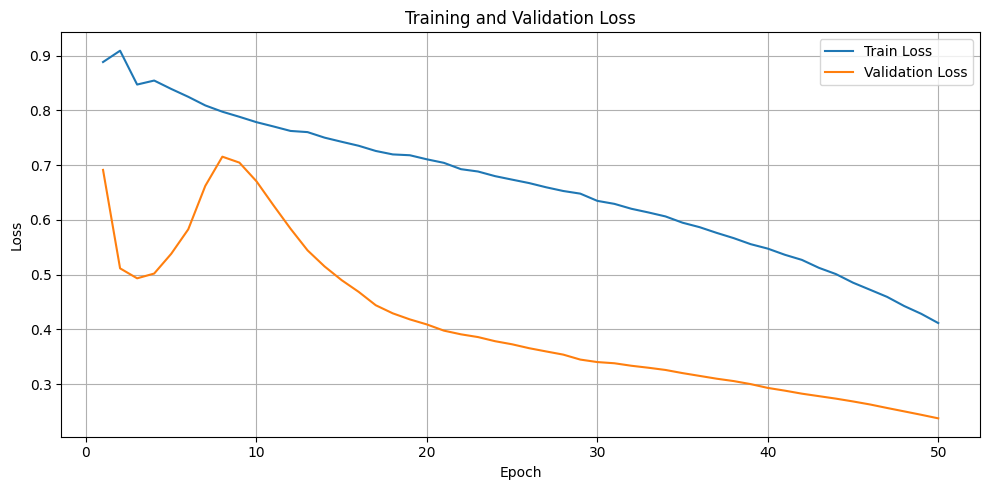

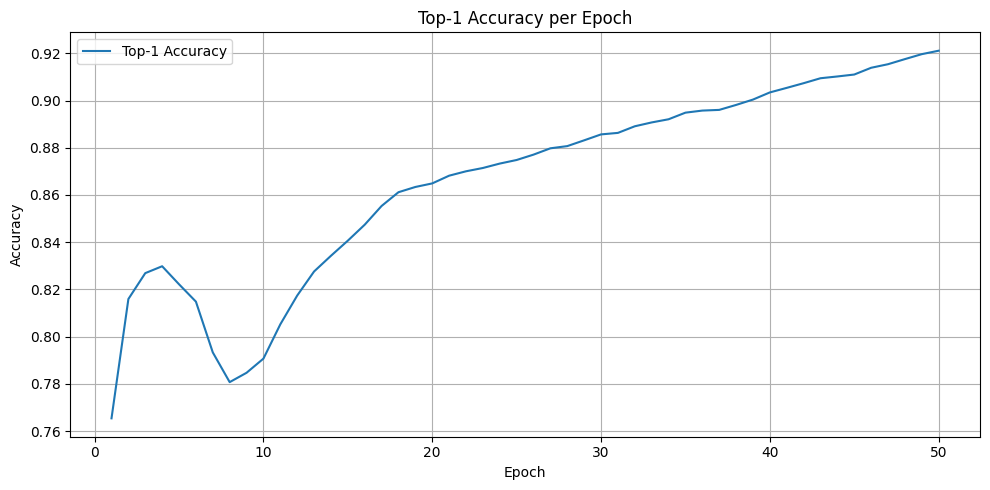

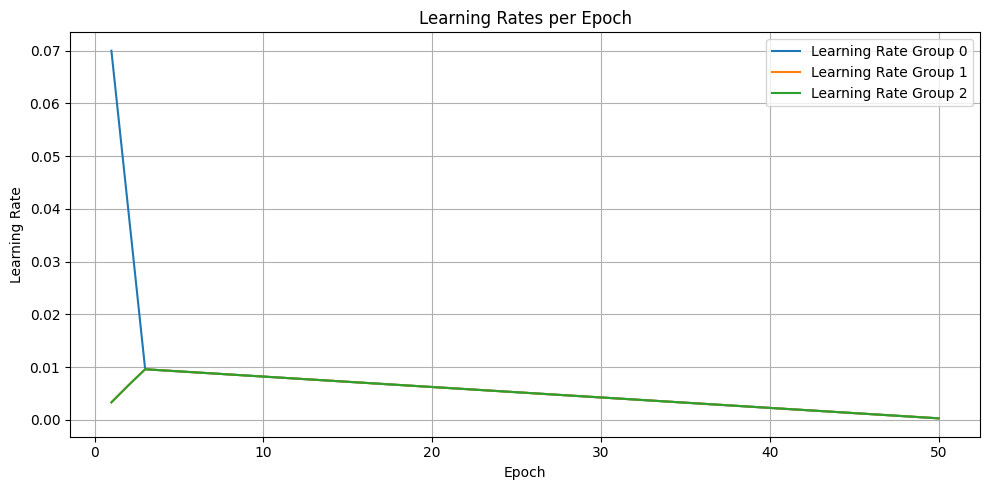

In [ ]:
import matplotlib.pyplot as plt



# Plot Training and Validation Loss

plt.figure(figsize=(10, 5))

plt.plot(results['epoch'], results['train/loss'], label='Train Loss')

plt.plot(results['epoch'], results['val/loss'], label='Validation Loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.title('Training and Validation Loss')

plt.legend()

plt.grid()

plt.tight_layout()

plt.savefig('loss_curve.png')

plt.show()



# Plot Top-1 Accuracy

plt.figure(figsize=(10, 5))

plt.plot(results['epoch'], results['metrics/accuracy_top1'], label='Top-1 Accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.title('Top-1 Accuracy per Epoch')

plt.legend()

plt.grid()

plt.tight_layout()

plt.savefig('accuracy_curve.png')

plt.show()



# Plot Learning Rates

plt.figure(figsize=(10, 5))

plt.plot(results['epoch'], results['lr/pg0'], label='Learning Rate Group 0')

plt.plot(results['epoch'], results['lr/pg1'], label='Learning Rate Group 1')

plt.plot(results['epoch'], results['lr/pg2'], label='Learning Rate Group 2')

plt.xlabel('Epoch')

plt.ylabel('Learning Rate')

plt.title('Learning Rates per Epoch')

plt.legend()

plt.grid()

plt.tight_layout()

plt.savefig('learning_rate_curve.png')

plt.show()

In [ ]:
from google.colab import files



# Download the generated plots

files.download('loss_curve.png')

files.download('accuracy_curve.png')

files.download('learning_rate_curve.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>